<a href="https://colab.research.google.com/github/vpaluparthi/ML_Assignment1/blob/main/Group244_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1

Assignment Topic: Build and Evaluate Machine Learning model for analysis of Breast Cancer dataset.

Names:
P. Vijaya Kumar (BITS ID: 2020FC04388)
Archana C (BITS ID: 2020FC04392)
Anirudh Kanukanti (BITS ID: )

Group: 244



# Step 1: Initialization

# A.	Import the required libraries

# B.	Download the dataset







In [933]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from scipy import stats

import matplotlib.pyplot as plt

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1AnRf3cl-MflHd4JVK07Az3UdvemNRU4a'})
fileDownloaded.GetContentFile('breast-cancer-wisconsin.csv')
data = pd.read_csv('breast-cancer-wisconsin.csv', delimiter=',')
data = data.drop(columns=['Sample code number'])

# Step 2:	Data Visualization and Exploration

# A.	Print the description and shape of the dataset.

# B.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [934]:
print(data.info(), '\n\n')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]), '\n\n')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None 


Number of instances = 699
Number of attributes = 10 




,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# C.	Try exploring the data and see what insights can be drawn from the dataset.
# D.	Provide appropriate visualization to get an insight about the dataset.

Plotting a box chart to see how the values of the features are spread out

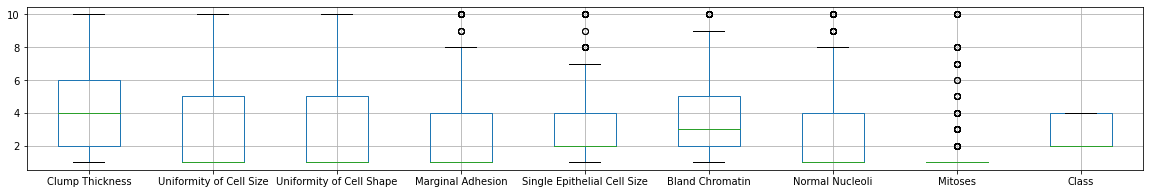

In [935]:
%matplotlib inline

data.boxplot(figsize=(20,3))

Check how the clump thickness values are distributed

Clump Thickness


1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

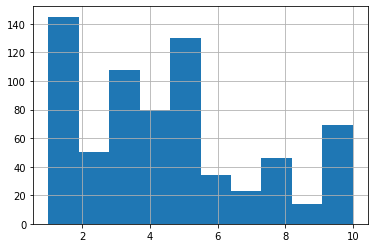

In [936]:
print('Clump Thickness')
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

Uniformity of Cell Size


1     384
2      45
3      52
4      40
5      30
6      27
7      19
8      29
9       6
10     67
Name: Uniformity of Cell Size, dtype: int64

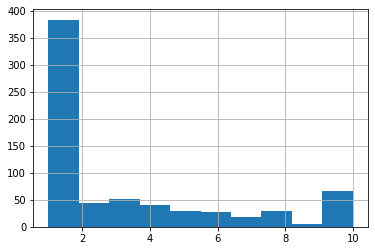

In [937]:
print('Uniformity of Cell Size')
data['Uniformity of Cell Size'].hist(bins=10)
data['Uniformity of Cell Size'].value_counts(sort=False)

Uniformity of Cell Shape


1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: Uniformity of Cell Shape, dtype: int64

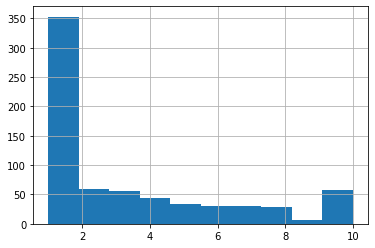

In [938]:
print('Uniformity of Cell Shape')
data['Uniformity of Cell Shape'].hist(bins=10)
data['Uniformity of Cell Shape'].value_counts(sort=False)

Uniformity of Cell Shape


1     353
2      59
3      56
4      44
5      34
6      30
7      30
8      28
9       7
10     58
Name: Uniformity of Cell Shape, dtype: int64

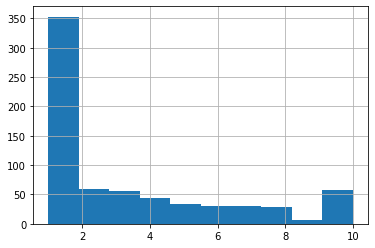

In [939]:
print('Uniformity of Cell Shape')
data['Uniformity of Cell Shape'].hist(bins=10)
data['Uniformity of Cell Shape'].value_counts(sort=False)

Marginal Adhesion


1     407
2      58
3      58
4      33
5      23
6      22
7      13
8      25
9       5
10     55
Name: Marginal Adhesion, dtype: int64

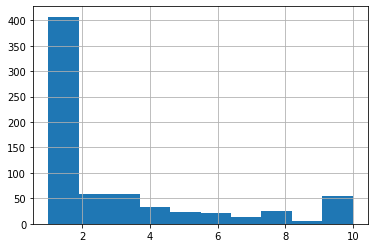

In [940]:
print('Marginal Adhesion')
data['Marginal Adhesion'].hist(bins=10)
data['Marginal Adhesion'].value_counts(sort=False)

Single Epithelial Cell Size


1      47
2     386
3      72
4      48
5      39
6      41
7      12
8      21
9       2
10     31
Name: Single Epithelial Cell Size, dtype: int64

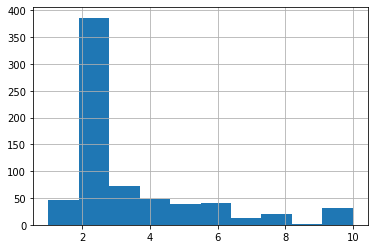

In [941]:
print('Single Epithelial Cell Size')
data['Single Epithelial Cell Size'].hist(bins=10)
data['Single Epithelial Cell Size'].value_counts(sort=False)

Bare Nuclei


8      21
6       4
?      16
5      30
1     402
10    132
2      30
3      28
7       8
4      19
9       9
Name: Bare Nuclei, dtype: int64

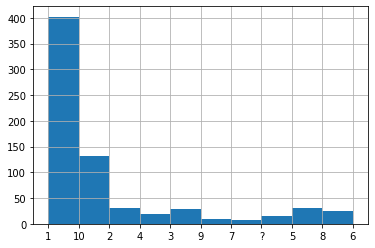

In [942]:
print('Bare Nuclei')
data['Bare Nuclei'].hist(bins=10)
data['Bare Nuclei'].value_counts(sort=False)

Bland Chromatin


1     152
2     166
3     165
4      40
5      34
6      10
7      73
8      28
9      11
10     20
Name: Bland Chromatin, dtype: int64

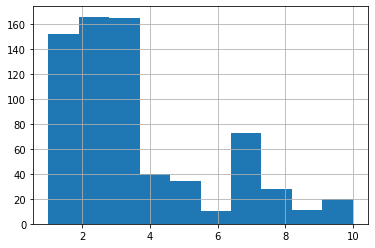

In [943]:
print('Bland Chromatin')
data['Bland Chromatin'].hist(bins=10)
data['Bland Chromatin'].value_counts(sort=False)

Normal Nucleoli


1     443
2      36
3      44
4      18
5      19
6      22
7      16
8      24
9      16
10     61
Name: Normal Nucleoli, dtype: int64

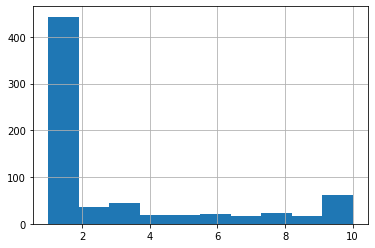

In [944]:
print('Normal Nucleoli')
data['Normal Nucleoli'].hist(bins=10)
data['Normal Nucleoli'].value_counts(sort=False)

Mitoses


1     579
2      35
3      33
4      12
5       6
6       3
7       9
8       8
10     14
Name: Mitoses, dtype: int64

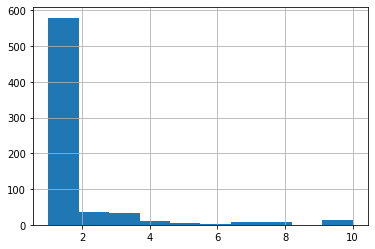

In [945]:
print('Mitoses')
data['Mitoses'].hist(bins=10)
data['Mitoses'].value_counts(sort=False)

# 3.	Data Pre-processing and cleaning
# A.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc.
# B. Applying Feature Transformation techniques

> Replacing "?" characters in data with n.NaN. Replacing these missing values with median value

> Filling missing values with median value in 'Bare Nuclei' column





In [946]:
data = data.replace('?',np.NaN)

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [947]:
bare_nuclei_data = data['Bare Nuclei']

print('Before replacing missing values:')
print(bare_nuclei_data[20:25])
bare_nuclei_data = bare_nuclei_data.fillna(bare_nuclei_data.median())
bare_nuclei_data = pd.to_numeric(bare_nuclei_data)
print('\nAfter replacing missing values:')
print(bare_nuclei_data[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [948]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data
data2['Bare Nuclei'] = bare_nuclei_data
data2 = data2.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 699


In [949]:
Z = np.abs(stats.zscore(data2))
#Z = (data2-data2.mean())/data2.std()
Z[20:25]

array([[0.91773703, 0.04410156, 0.40657446, 2.52095546, 0.80623884,
        1.79966407, 0.64114721, 0.37131451, 1.40653241, 1.37855538],
       [1.983939  , 0.61179192, 0.60359928, 0.06768675, 1.25817224,
        0.97078299, 1.46195655, 2.33759359, 0.34391178, 1.37855538],
       [0.50386559, 0.69999505, 0.74329904, 0.63324716, 0.54956136,
        0.68697917, 0.5900668 , 0.61182504, 0.34391178, 0.72539705],
       [1.27313768, 0.28384518, 0.60359928, 0.63324716, 0.54956136,
        0.68697917, 1.46195655, 0.04360132, 0.34391178, 1.37855538],
       [1.2146669 , 0.69999505, 0.74329904, 0.63324716, 0.54956136,
        0.68697917, 0.17966213, 0.61182504, 0.34391178, 0.72539705]])

In [950]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
#Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
#print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))
threshold = 3
print(np.where(Z > 3))
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
#data2 = data2[(Z < 3).all(axis=1)]

Number of rows before discarding outliers = 699
(array([ 43,  53,  53,  62,  65,  68,  71,  71,  84,  85,  85,  98,  98,
       100, 104, 104, 105, 113, 117, 122, 129, 149, 149, 163, 167, 173,
       175, 187, 191, 201, 221, 229, 236, 238, 254, 261, 264, 268, 279,
       286, 286, 302, 312, 344, 357, 357, 360, 360, 366, 400, 416, 421,
       425, 482, 482, 506, 608, 612, 648, 648, 680, 689]), array([4, 4, 8, 4, 8, 8, 4, 8, 8, 4, 8, 4, 8, 4, 4, 8, 8, 4, 8, 4, 4, 4,
       8, 8, 8, 8, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 8, 8, 4, 8, 8, 4, 4,
       4, 8, 4, 8, 8, 8, 4, 4, 4, 4, 8, 8, 4, 8, 4, 8, 8, 8]))
Clump Thickness                2.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                2.0
Normal Nucleoli                1.0
Mitoses                        1.0
Class                          2.0
Name: 0.25, dtype: float64 Clump Thickness   

In [951]:
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data2.loc[[11,28]]

Number of duplicate rows = 242


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


Removing duplicate rows

In [952]:
data2.drop_duplicates()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2,2
694,3,1,1,1,3,2.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [953]:
sample = data2.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
271,5,1,1,1,2,1.0,3,1,1,2
401,3,1,1,1,2,1.0,1,1,1,2
664,3,1,1,3,2,1.0,2,1,1,2


In [954]:
sample = data2.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1.0,1,1,1,2
417,1,1,1,1,2,1.0,2,1,1,2
606,4,1,1,2,2,1.0,1,1,1,2
349,4,2,3,5,3,8.0,7,6,1,4
134,3,1,1,1,3,1.0,2,1,1,2
502,4,1,1,2,2,1.0,2,1,1,2
117,4,5,5,10,4,10.0,7,5,8,4


In [955]:
sample = data2.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1.0,7,1,1,2
235,3,1,4,1,2,1.0,3,1,1,2
72,1,3,3,2,2,1.0,7,2,1,2
645,3,1,1,1,2,1.0,2,1,1,2
144,2,1,1,1,2,1.0,2,1,1,2
129,1,1,1,1,10,1.0,1,1,1,2
583,3,1,1,1,2,1.0,1,1,1,2


In [956]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

# 3 C .	Correlational analysis on the dataset and visualization


In [957]:
# Check the correlation in the data
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


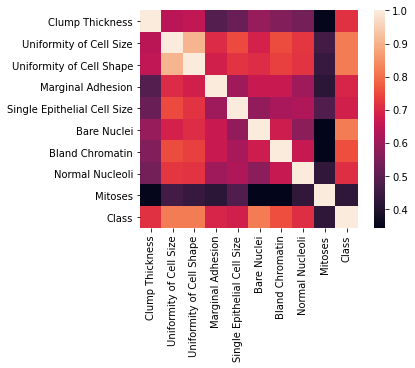

In [958]:
sns.heatmap(data.corr(), square = True)

# 3B Applying Feature Reduction techniques
# Features "Uniformity of Cell Size" and "Uniformity of Cell Shape" are highly correlated. So dropping the feature "Uniformity of Cell Size"


In [959]:
data2.drop(['Uniformity of Cell Size'],axis=1)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,2
1,5,4,5,7,10.0,3,2,1,2
2,3,1,1,2,2.0,3,1,1,2
3,6,8,1,3,4.0,3,7,1,2
4,4,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2.0,1,1,1,2
695,2,1,1,2,1.0,1,1,1,2
696,5,10,3,7,3.0,8,10,2,4
697,4,6,4,3,4.0,10,6,1,4


# 4.	Data Preparation

In [960]:
features = ['Clump Thickness', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']
X = data2[features]
# Label selection
y = data2.Class
print('X:', X)
print('y:', y)
# For testing purpose
train_X, test_X, train_y, test_y = train_test_split(X, y)

X:      Clump Thickness  Uniformity of Cell Shape  ...  Normal Nucleoli  Mitoses
0                  5                         1  ...                1        1
1                  5                         4  ...                2        1
2                  3                         1  ...                1        1
3                  6                         8  ...                7        1
4                  4                         1  ...                1        1
..               ...                       ...  ...              ...      ...
694                3                         1  ...                1        1
695                2                         1  ...                1        1
696                5                        10  ...               10        2
697                4                         6  ...                6        1
698                4                         8  ...                4        1

[699 rows x 8 columns]
y: 0      2
1      2
2      2
3      

# Part B 

# 1. Model Building: This section uses 4 models to predict the Class labels for test data. i.e. RandomForestClassifier, LogisticRegression, GaussianNaiiveBayes, DecisionTreeClassifier


# Model 1: Using RandomForestClassifier to train the model

In [961]:
# Loop is used to get more generalized result
total_sum = []
# Hypertuning of parameters for better prediction
forest_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=9)
forest_fit = forest_model.fit(train_X, train_y)




> Predict the Class labels for the test data





In [962]:
# For testing purpose
#forest_model.fit(train_X, train_y)
# Pass values to get prediction for ratings
# 1st value = Clump Thickness
# 2nd value = Uniformity of Cell Shape
# 3rd value = Marginal Adhesion
# 4th value = Single Epithelial Cell Size
# 5th value = Bare Nuclei
# 6th value = Bland Chromatin
# 7th value = Normal Nucleoli
# 8th value = Mitoses
 
# Just for testing purpose
#forest_pred = forest_model.predict([[10,7,3,8,5,7,4,3]])

forest_pred = forest_model.predict(test_X)
print('Classes predicted by RandomForestClassifer for test data are:', forest_pred)

Classes predicted by RandomForestClassifer for test data are: [2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 4 4 2 4 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4
 2 2 4 2 4 4 2 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4
 2 4 2 2 2 4 4 4 2 2 4 4 4 2 2 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2
 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2 2 4
 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2]


 > Print the training accuracy and loss values


In [963]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, forest_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, forest_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, forest_pred)))
print('Cross Entropy:', log_loss(test_y,forest_pred,eps=1e-15,sample_weight=None, labels=None)/len(test_y))
print('Classification Report:', metrics.classification_report(test_y,forest_pred))
score_rfcla = forest_model.score(test_X, test_y)
print('Accuracy Score:', score_rfcla)

Mean Absolute Error: 0.03428571428571429
Mean Squared Error: 0.06857142857142857
Root Mean Squared Error: 0.26186146828319085
Cross Entropy: 0.13421092385595312
Classification Report:               precision    recall  f1-score   support

           2       1.00      0.97      0.99       119
           4       0.95      1.00      0.97        56

    accuracy                           0.98       175
   macro avg       0.97      0.99      0.98       175
weighted avg       0.98      0.98      0.98       175

Accuracy Score: 0.9828571428571429


> Part B: Print Confusion Matrix





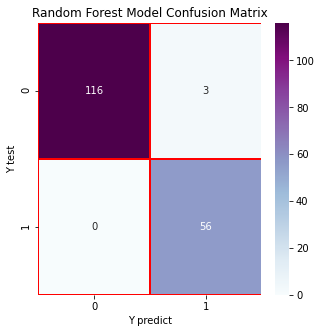

In [964]:
forest_model_cm = confusion_matrix(test_y, forest_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(forest_model_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Model 2: Using LogisticRegression to train the model

In [965]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



> Predicting Class labels for the test data



In [966]:
logreg_predict = logreg.predict(test_X)
print('Classes predicted by LogisticRegression model for test data are:', logreg_predict)

Classes predicted by LogisticRegression model for test data are: [2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 4 4 2 4 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4
 2 4 4 2 4 4 2 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4
 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2
 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2 2 2
 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2]


 > Print the training accuracy and loss values

In [967]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, logreg_predict))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, logreg_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, logreg_predict)))
print('Cross Entropy:', log_loss(test_y,logreg_predict,eps=1e-15,sample_weight=None, labels=None)/len(test_y))
print('Classification Report:', metrics.classification_report(test_y,logreg_predict))
print('Accuracy Score:', logreg.score(test_X, test_y))

Mean Absolute Error: 0.06857142857142857
Mean Squared Error: 0.13714285714285715
Root Mean Squared Error: 0.3703280399090206
Cross Entropy: 0.13421092385595312
Classification Report:               precision    recall  f1-score   support

           2       0.98      0.97      0.97       119
           4       0.93      0.96      0.95        56

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175

Accuracy Score: 0.9657142857142857


> Part B: Print the confusion matrix.

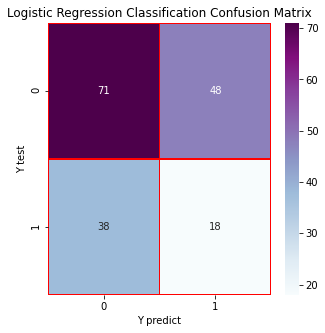

In [968]:
logreg_cm = confusion_matrix(test_y, predict_y)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Model 3: Using NaiiveBayes Classifier to train the model

In [969]:
# We define the model
nbcla = GaussianNB()
# We train model
nbcla.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

> Predicting Class labels for the test data

In [970]:
# We predict target values
nbcla_predict = nbcla.predict(test_X)
print('Classes predicted by GaussianNB model for test data are:', nbcla_predict)

Classes predicted by GaussianNB model for test data are: [2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 4 4 2 4 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4
 2 2 4 2 4 4 2 2 2 2 4 2 4 2 2 2 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 4
 2 4 2 2 2 4 4 4 2 2 4 4 4 4 2 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2
 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2 2 2
 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2]


 > Print the training accuracy and loss values



In [971]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, nbcla_predict))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, nbcla_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, nbcla_predict)))
print('Cross Entropy:', log_loss(test_y,nbcla_predict,eps=1e-15,sample_weight=None, labels=None)/len(test_y))
print('Classification Report:', metrics.classification_report(test_y,nbcla_predict))
print('Accuracy Score:', nbcla.score(test_X, test_y))

Mean Absolute Error: 0.06857142857142857
Mean Squared Error: 0.13714285714285715
Root Mean Squared Error: 0.3703280399090206
Cross Entropy: 0.13421092385595312
Classification Report:               precision    recall  f1-score   support

           2       0.99      0.96      0.97       119
           4       0.92      0.98      0.95        56

    accuracy                           0.97       175
   macro avg       0.95      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175

Accuracy Score: 0.9657142857142857


> Part B: Print the confusion matrix.


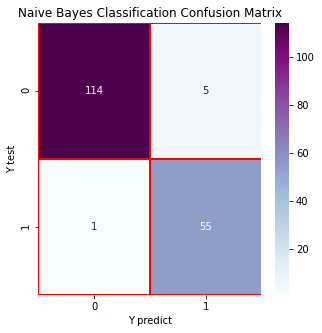

In [972]:
nbcla_cm = confusion_matrix(test_y, nbcla_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Model 4: Using DecisionTreeClassifier to train the model

In [973]:

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(train_X, train_y)




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')



> Predict the class values for the test data



In [974]:
# We predict target values
dcla_predict = dtcla.predict(test_X)
print('Classes predicted by DecisionTreeClassifier model for test data are:', dcla_predict)

Classes predicted by DecisionTreeClassifier model for test data are: [2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 4 4 2 4 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4
 2 4 4 2 4 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 4 2 4 2 2 2 2 4
 2 4 2 2 2 4 4 4 2 2 4 4 4 4 2 2 2 4 4 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2
 2 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2]


 > Print the training accuracy and loss values

In [975]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, dcla_predict))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, dcla_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, dcla_predict)))
print('Cross Entropy:', log_loss(test_y,dcla_predict,eps=1e-15,sample_weight=None, labels=None)/len(test_y))
print('Classification Report:', metrics.classification_report(test_y,dcla_predict))
print('Accuracy Score:', dtcla.score(test_X, test_y))

Mean Absolute Error: 0.17142857142857143
Mean Squared Error: 0.34285714285714286
Root Mean Squared Error: 0.5855400437691199
Cross Entropy: 0.13421092385595312
Classification Report:               precision    recall  f1-score   support

           2       0.94      0.93      0.94       119
           4       0.86      0.88      0.87        56

    accuracy                           0.91       175
   macro avg       0.90      0.90      0.90       175
weighted avg       0.91      0.91      0.91       175

Accuracy Score: 0.9142857142857143


> Part B: Print the confusion matrix.

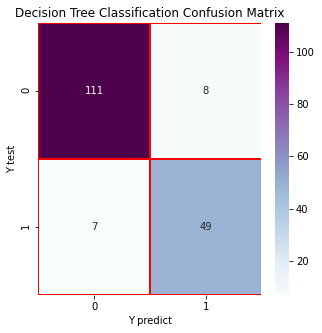

In [976]:
dtcla_cm = confusion_matrix(test_y, dcla_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [977]:
Testscores = pd.Series([score_rfcla, score_logreg, score_nbcla, score_dtcla, ], 
                        index=['Random Forest Score', 'Logistic Regression Score', 'Naive Bayes Score', 'Decision Tree Score']) 
print(Testscores)

Random Forest Score          0.982857
Logistic Regression Score    0.911706
Naive Bayes Score            0.948571
Decision Tree Score          0.937143
dtype: float64


# Inference:

As per the outcome above, out of the 4 classifiers, Random Forest Classifier has the most optimal result accuracy with an accuracy of 98.28% followed by Naive Bayes Classifier. This is due to the iteration of all 100 trees in the forest in the assembly because of which the label that gets the most incidents is reported as prediction.

